  # FOODCAST

<hr style="border:2px solid white"> </hr>

le but ici est de construire un modèle qui permet de prédire si une personne (selon ses caractéristiques) gagnera plus de 2 000 € ou non.

Dans la suite, nous aurons besoin des fonctions suivantes.

In [1]:
import sys
sys.path.append('..')
from foodcast.infrastructure.extract import extract
from foodcast.domain.transform import etl
from foodcast.domain.transform import calculate_cramer_v
from foodcast.domain.transform import plot_cramer_heatmap
from foodcast.domain.multi_model import model

  ##### Chargement et nettoyage des données

Voici la descriptions de la fonction ETL

In [7]:
etl?

Signature: etl(chemin_data: str, colonnes_a_retirer: list, variables: list) -> pandas.core.frame.DataFrame
Docstring:
fonction qui prend un dataframe fait toute les transformation nécéssaire
et la charge 

Parameters:
---------------
- chemin_data (str) : chemin vers le fichier

- colonnes_a_retirer (list) : list des colonnes à retirer

- variables (list) : variables pour laquelle ont veux calculer les données abbérantes 


Return :
Un DataFrame propre et recoder prêt à l'emploi
File:      \\ad.univ-lille.fr\etudiants\homedir3\142068\documents\mlops_projet\foodcast\domain\transform.py
Type:      function

La fonction ETL est employée pour préparer la base de données destinée à la modélisation.

In [4]:
data = etl('../data/fichier.csv', ['DIPL0', 'DIPL1', 'DIPL2a', 'DIPL2b', 'DIPL2c', 'DIPL3',
       'DIPL4', 'DIPL5a', 'DIPL5b', 'DIPL6a', 'DIPL6b', 'DIPL6c', 'DIPL7'],['AGE13'])

Suite à l'application de la fonction ETL, les données sont affichées pour permettre une observation approfondie de leur structure.

In [5]:
data

,CFA,Q1,AGE13,PHD,CA9C,CA10C,CA11,CA12,SALAIRE
0,2,1,25,6,5,9,6.0,5.0,1
1,2,2,24,6,3,2,4.0,4.0,1
2,2,1,21,4,4,9,3.0,5.0,1
3,2,1,25,5,4,2,6.0,3.0,1
4,2,1,22,6,3,9,3.0,1.0,1
...,...,...,...,...,...,...,...,...,...
5995,2,2,22,6,4,4,5.0,6.0,1
5996,2,1,24,6,3,2,2.0,3.0,1
5997,2,1,22,6,2,2,3.0,5.0,1
5998,2,1,23,6,5,4,3.0,4.0,1


  ##### V de cramer

Voici la descriptions de la fonction calculate_cramer_v

In [6]:
calculate_cramer_v?

Signature:
calculate_cramer_v(
    data: pandas.core.frame.DataFrame,
    categorical_vars: list,
) -> pandas.core.frame.DataFrame
Docstring:
Calcule le V de Cramer pour chaque paire de variables catégorielles dans le DataFrame.

Parameters:
- data (pd.DataFrame): Le DataFrame contenant les données.
- categorical_vars (list): La liste des noms de variables catégorielles.

Returns:
- pd.DataFrame: Un DataFrame contenant les valeurs du V de Cramer pour chaque paire de variables.
File:      \\ad.univ-lille.fr\etudiants\homedir3\142068\documents\mlops_projet\foodcast\domain\transform.py
Type:      function

La fonction calculate_cramer_v est appliquée à la base de données préalablement nettoyée. 

In [8]:
datacramer = calculate_cramer_v(data,['CFA', 'AGE13', 'PHD', 'CA9C', 'CA10C', 'CA11', 'CA12', 'SALAIRE'])

Voici la descriptions de la fonction plot_cramer_heatmap

In [9]:
plot_cramer_heatmap?

Signature: plot_cramer_heatmap(cramer_df: pandas.core.frame.DataFrame)
Docstring:
Crée et affiche une heatmap du V de Cramer.

Parameters:
- cramer_df (pd.DataFrame): Le DataFrame contenant les valeurs du V de Cramer.
File:      \\ad.univ-lille.fr\etudiants\homedir3\142068\documents\mlops_projet\foodcast\domain\transform.py
Type:      function

La fonction plot_cramer_heatmap est employée pour visualiser de manière graphique les valeurs de Cramer's V obtenues précédemment. Cette représentation sous forme de heatmap permet une observation visuelle des relations et des niveaux de corrélation entre les variables de la base de données.

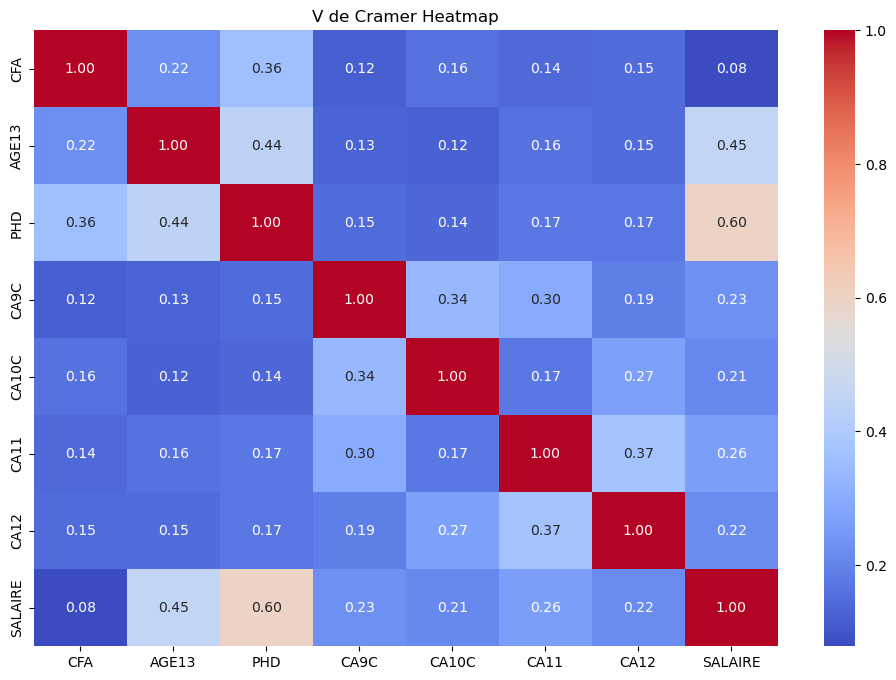

In [10]:
plot_cramer_heatmap(datacramer)

  ##### Modélisation

Voici la descriptions de la fonction model

In [12]:
model?

Signature: model(data: pandas.core.frame.DataFrame)
Docstring:
Entraîne et évalue plusieurs modèles de classification sur le DataFrame d'entrée.

Parameters:
- data (pd.DataFrame): Le DataFrame contenant les données. Il doit inclure une colonne 'SALAIRE' comme variable cible.

Returns:
- pd.DataFrame: Un DataFrame contenant les résultats de l'évaluation des modèles.

Cette fonction effectue les étapes suivantes :
1. Divise les données d'entrée en ensembles d'entraînement et de test.
2. Définit un ensemble de modèles de classification, y compris DecisionTree, KNeighbors, LogisticRegression et RandomForest.
3. Spécifie des grilles d'hyperparamètres pour chaque modèle pour l'ajustement des hyperparamètres.
4. Itère sur chaque modèle, créant un pipeline avec ou sans mise à l'échelle en fonction du type de modèle.
5. Utilise GridSearchCV pour trouver les meilleurs hyperparamètres pour chaque modèle.
6. Affiche et enregistre les meilleurs hyperparamètres, la précision, le score et le rapport

Dans cette section, nous présentons les résultats de l'évaluation de plusieurs modèles de classification visant à prédire si une personne, en fonction de ses caractéristiques, gagnera plus de 2 000 € ou non. Les modèles inclus sont DecisionTree, KNeighbors, LogisticRegression, et RandomForest. Les résultats comprennent les meilleurs paramètres pour chaque modèle, la précision, le score, et le rapport de classification sur l'ensemble de test. \
Les résultats détaillés pour chaque modèle sont présentés ci-dessous :

In [11]:
model(data)

Best parameters for DecisionTree: {'model__criterion': 'entropy', 'model__max_depth': 5}
Accuracy for DecisionTree: 0.8597883597883598
Score for DecisionTree: 0.8597883597883598
Classification Report for DecisionTree:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       871
           1       0.77      0.56      0.65       263

    accuracy                           0.86      1134
   macro avg       0.83      0.75      0.78      1134
weighted avg       0.85      0.86      0.85      1134

Best parameters for KNeighbors: {'model__n_neighbors': 7, 'model__weights': 'uniform'}
Accuracy for KNeighbors: 0.8201058201058201
Score for KNeighbors: 0.8201058201058201
Classification Report for KNeighbors:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       871
           1       0.65      0.49      0.56       263

    accuracy                           0.82      1134
   macro avg       0.75    

c:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, 

Best parameters for LogisticRegression: {'model__C': 0.1, 'model__penalty': 'l2'}
Accuracy for LogisticRegression: 0.8156966490299824
Score for LogisticRegression: 0.8156966490299824
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       871
           1       0.69      0.38      0.49       263

    accuracy                           0.82      1134
   macro avg       0.76      0.66      0.69      1134
weighted avg       0.80      0.82      0.79      1134

Best parameters for RandomForest: {'model__criterion': 'entropy', 'model__max_depth': 10, 'model__n_estimators': 200}
Accuracy for RandomForest: 0.8544973544973545
Score for RandomForest: 0.8544973544973545
Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       871
           1       0.74      0.58      0.65       263

    accuracy                     

Le modèle RandomForest avec une profondeur maximale de 10, un critère d'entropie et 200 estimateurs a été identifié comme le meilleur modèle dans cette évaluation. \
Cette conclusion repose sur sa précision globale de 85,45%, indiquant sa capacité à classifier avec précision les données d'évaluation. La combinaison de nombreux arbres de décision, chacun formé sur une sous-section aléatoire des données, permet à RandomForest de capturer des relations dans les données, tout en réduisant le risque de surajustement. La profondeur limitée à 10 contribue à éviter un surajustement excessif, assurant ainsi une meilleure généralisation du modèle. \
Ces caractéristiques font du modèle RandomForest le meilleur choix pour la tâche de modélisation.